# Modelos de Regresión con Pycaret

#### Obtener datos

In [61]:
from pycaret.classification import *
import pandas as pd

In [40]:
# load the dataset from pycaret
from pycaret.datasets import get_data
dataset = pd.read_csv('heart_attack_prediction_dataset.csv')

#### EDA

In [41]:
pd.set_option('display.max_columns',None)

In [42]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [43]:
dataset.head(10)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
5,ZOO7941,54,Female,297,172/86,48,1,1,1,0,1,0.625008,Unhealthy,1,1,2,7.798752,241339,20.146840,795,5,10,Germany,Europe,Northern Hemisphere,1
6,WYV0966,90,Male,358,102/73,84,0,0,1,0,1,4.098177,Healthy,0,0,7,0.627356,190450,28.885811,284,4,10,Canada,North America,Northern Hemisphere,1
7,XXM0972,84,Male,220,131/68,107,0,0,1,1,1,3.427929,Average,0,1,4,10.543780,122093,22.221862,370,6,7,Japan,Asia,Northern Hemisphere,1
8,XCQ5937,20,Male,145,144/105,68,1,0,1,1,0,16.868302,Average,0,0,5,11.348787,25086,35.809901,790,7,4,Brazil,South America,Southern Hemisphere,0
9,FTJ5456,43,Female,248,160/70,55,0,1,1,1,1,0.194515,Unhealthy,0,0,4,4.055115,209703,22.558917,232,7,7,Japan,Asia,Northern Hemisphere,0


In [44]:
dataset[['Blood Preasure sistonic', 'Blood Preasure diastonic']] = dataset['Blood Pressure'].str.split('/', expand=True)
dataset[['Blood Preasure sistonic', 'Blood Preasure diastonic']] = dataset[['Blood Preasure sistonic', 'Blood Preasure diastonic']].astype(int)
dataset.drop(['Continent', 'Hemisphere', 'Patient ID', 'Blood Pressure'], axis=1, inplace= True)

In [45]:
dataset.head(10)

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk,Blood Preasure sistonic,Blood Preasure diastonic
0,67,Male,208,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,0,158,88
1,21,Male,389,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,0,165,93
2,21,Female,324,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,0,174,99
3,84,Male,383,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,0,163,100
4,66,Male,318,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,0,91,88
5,54,Female,297,48,1,1,1,0,1,0.625008,Unhealthy,1,1,2,7.798752,241339,20.146840,795,5,10,Germany,1,172,86
6,90,Male,358,84,0,0,1,0,1,4.098177,Healthy,0,0,7,0.627356,190450,28.885811,284,4,10,Canada,1,102,73
7,84,Male,220,107,0,0,1,1,1,3.427929,Average,0,1,4,10.543780,122093,22.221862,370,6,7,Japan,1,131,68
8,20,Male,145,68,1,0,1,1,0,16.868302,Average,0,0,5,11.348787,25086,35.809901,790,7,4,Brazil,0,144,105
9,43,Female,248,55,0,1,1,1,1,0.194515,Unhealthy,0,0,4,4.055115,209703,22.558917,232,7,7,Japan,0,160,70


In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float64
 10  Diet                             8763 non-null   object 
 11  Previous Heart Problems          8763 non-null   int64  
 12  Medication Use      

In [47]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (7887, 24)
Unseen Data For Predictions (876, 24)


#### Preprocesamiento

In [63]:
# initialize setup

exp_reg102 = setup(data = data, target = 'Heart Attack Risk', 
                   session_id=123,
                   normalize = True, 
                   transformation = True,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                  log_experiment = True, experiment_name = 'HAR') 

,Description,Value
0,Session id,123
1,Target,Heart Attack Risk
2,Target type,Binary
3,Original data shape,"(7887, 24)"
4,Transformed data shape,"(7887, 45)"
5,Transformed train set shape,"(5520, 45)"
6,Transformed test set shape,"(2367, 45)"
7,Ordinal features,1
8,Numeric features,20
9,Categorical features,3


#### Entrenamiento de modelos

In [87]:
best_model = compare_models(n_select=15,verbose=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)


Processing:   0%|          | 0/74 [00:00<?, ?it/s]

In [90]:
for b in best_model[10:]:
    print(b)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
GaussianNB(priors=None, var_smoothing=1e-09)
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')
QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)


In [65]:
tuned_best = tune_model(best_model)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [67]:
tuned_best

DummyClassifier(constant=None, random_state=123, strategy='prior')

#### Entrenamiento de modelos individuales

In [73]:
dummy_cl = create_model('dummy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6413,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.6413,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.6413,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.6413,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.6413,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.6413,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.6413,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.6395,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.6395,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [91]:
import numpy as np
dummy_params = {'strategy': ['most_frecuent','prior', 'uniform'],
                        'random_state':[123,152,627,420,69],
                        'constant':[None]
                        }

tuned_dummy = tune_model(dummy_cl, 
                            custom_grid = dummy_params)


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:28:46
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Dummy Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

TypeError: Parameter grid for parameter 'actual_estimator__constant' is not iterable or a distribution (value=None)

### Evaluar el modelo

In [54]:
tuned_best = tuned_lightgbm

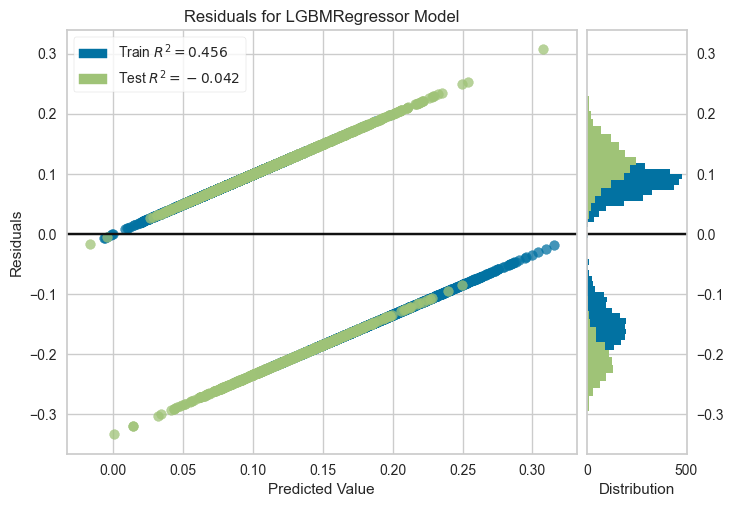

In [55]:
# check the residuals of trained model
plot_model(tuned_best, plot = 'residuals')

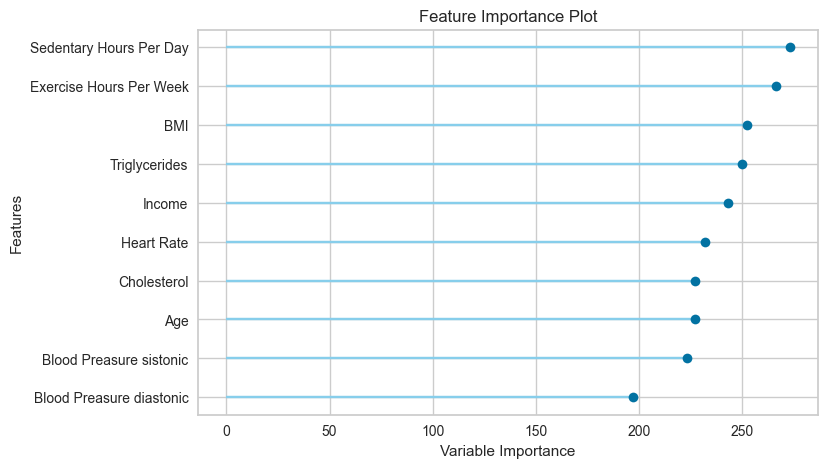

In [56]:
# check feature importance
plot_model(tuned_best, plot = 'feature')

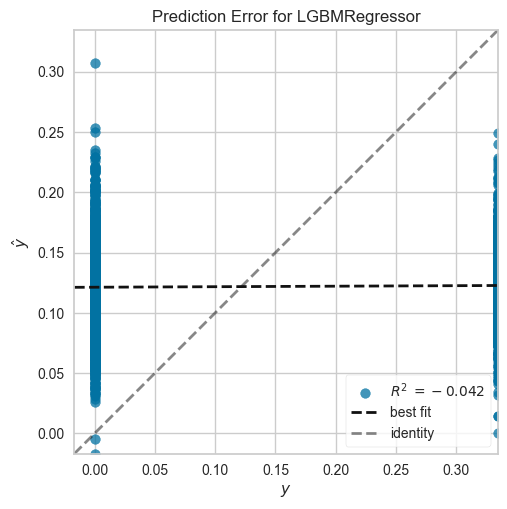

In [57]:
plot_model(tuned_best, plot = 'error')

In [58]:
evaluate_model(tuned_best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Interpretabilidad

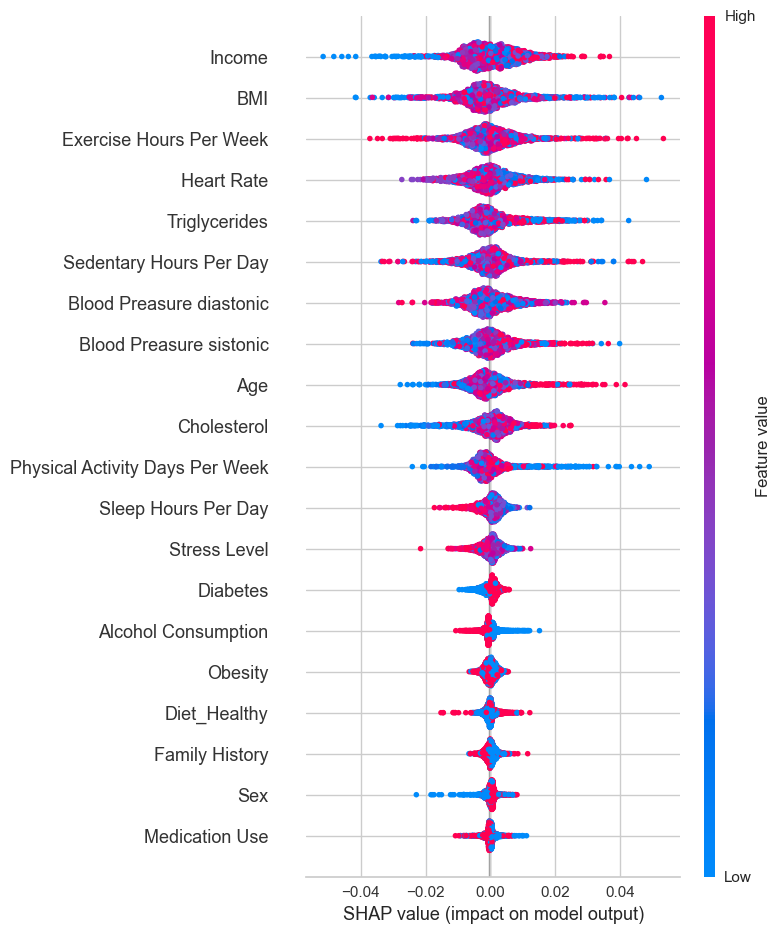

In [59]:
# Global Plot Settings
fig_kwargs={'renderer': 'notebook'}
import matplotlib.pyplot as plt
plt.figure(figsize = (18,9))
interpret = interpret_model(tuned_best)


In [60]:
interpret_model(tuned_best, plot = 'reason', observation = 12)

### Explainer Dashboard

In [17]:
dashboard(tuned_best, display_format = 'inline')

Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard inline (terminate it with ExplainerDashboard.terminate(8050))
